# Redshift Data of DESIJ1537+1443

Author: Anowar Shajib, S M Rafee Adnan

In [1]:
! pip install astropy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 26.0 MB/s eta 0:00:00


## Load data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.wcs import WCS

In [3]:
data, header = fits.getdata("/kaggle/input/fits-file/DESIJ15371443_F140W_drz_sci.fits", header=True)

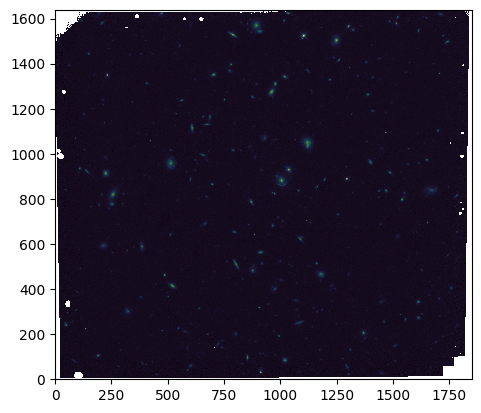

In [4]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [5]:
FILENAME = "/kaggle/input/phot-z/photo_z_DESIJ15371443.csv"  # need to be changed for each cluster file
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.006217,8000415397001869,234.476361,14.717462,8000,415397,1869,REX,0.001,R7,0.711,0.094,1,1
1,0.007106,8000415397001894,234.480471,14.716063,8000,415397,1894,REX,0.005,R8,1.057,0.131,1,1
2,0.008144,8000415397001896,234.480316,14.714988,8000,415397,1896,PSF,0.009,P9,0.966,0.326,1,1
3,0.007866,8000415397001905,234.478368,14.715228,8000,415397,1905,PSF,0.003,P9,1.321,0.460,1,1
4,0.004347,8000415397001980,234.479187,14.718709,8000,415397,1980,REX,0.002,R0,0.932,0.233,1,1


In [6]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

Canvas(toolbar=None)

In [7]:
# In degrees
center_x, center_y = 234.4791667, 14.7230556  # RA 15:37:55 DEC 14:43:23
radii = 25  # in arcsec
radii_deg = radii / 3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

664.2458191167824 1268.7270844762584


In [8]:
data_legacy_cropped = data_legacy[(data_legacy["RAJ2000"] < x_upper) & (data_legacy["RAJ2000"] > x_lower) & (data_legacy["DEJ2000"] < y_upper) & (data_legacy["DEJ2000"] > y_lower)]

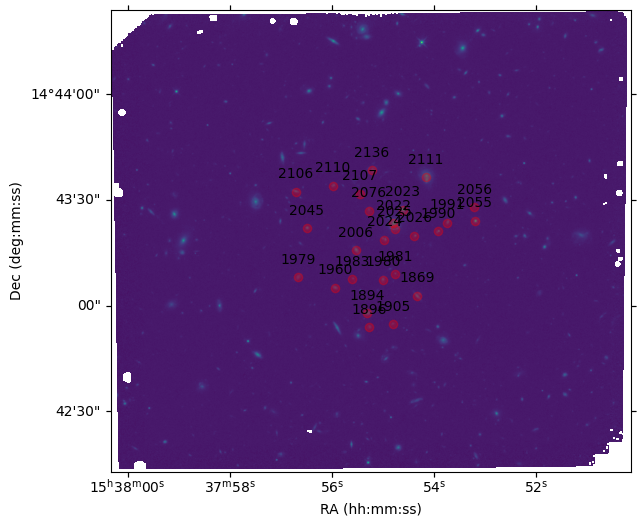

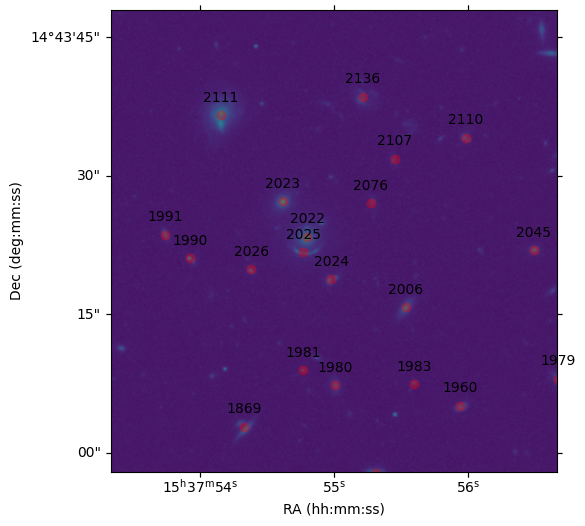

In [9]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

In [10]:
data_legacy.sort_values(by="objid")

# central deflector
central_deflector_id = 2022
object_ids = [central_deflector_id,
              2026, 2023, 2024, 2076]  

columns_to_drop = [
    "id",
    "release",
    "brickid",
    "fclean",
    "fqual"
]  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[
    data_legacy_dropped["objid"].isin(object_ids)
]
selected_data_legacy.set_index("objid", inplace=True)

print(selected_data_legacy)

             _r     RAJ2000    DEJ2000 type  pstar gmmcomp  zphot  e_zphot
objid                                                                     
2026   0.002628  234.476599  14.722195  REX  0.662      R6  0.743    0.184
2022   0.000819  234.478327  14.723165  DEV  0.007      D8  0.653    0.043
2023   0.001944  234.477565  14.724231  REX  0.046      R4  0.547    0.073
2024   0.001170  234.479085  14.721888  PSF  0.424      P8  0.706    0.666
2076   0.001576  234.480317  14.724173  PSF  0.000      P7  0.996    0.274


In [11]:
zphot_deflector = selected_data_legacy.loc[central_deflector_id, "zphot"]
del_z = 0.03 * (1 + zphot_deflector)
print("zphot_deflector:", zphot_deflector)
print("del_z:", del_z)
data_legacy_cropped_dropped = data_legacy_cropped.drop(columns=columns_to_drop)
data_legacy_cropped_dropped.set_index("objid", inplace=True)
# selected_data_legacy.set_index("objid", inplace=True)

not_neighbour_data_legacy = data_legacy_cropped_dropped[
    (data_legacy_cropped_dropped["zphot"] <= zphot_deflector - del_z) |
    (data_legacy_cropped_dropped["zphot"] >= zphot_deflector + del_z)
]

print(not_neighbour_data_legacy)

zphot_deflector: 0.653
del_z: 0.04959
             _r     RAJ2000    DEJ2000 type  pstar gmmcomp  zphot  e_zphot
objid                                                                     
1869   0.006217  234.476361  14.717462  REX  0.001      R7  0.711    0.094
1980   0.004347  234.479187  14.718709  REX  0.002      R0  0.932    0.233
1981   0.004013  234.478203  14.719153  PSF  0.004      P5  1.213    0.528
1990   0.004369  234.474682  14.722529  PSF  0.027      P2  0.337    0.141
2026   0.002628  234.476599  14.722195  REX  0.662      R6  0.743    0.184
1960   0.006239  234.483076  14.718093  REX  0.003      R4  0.732    0.105
1983   0.004947  234.481662  14.718737  PSF  0.005      P0  1.019    0.681
2023   0.001944  234.477565  14.724231  REX  0.046      R4  0.547    0.073
2024   0.001170  234.479085  14.721888  PSF  0.424      P8  0.706    0.666
2045   0.006015  234.485378  14.722761  EXP  0.004      E1  0.436    0.286
2076   0.001576  234.480317  14.724173  PSF  0.000      P7  0.

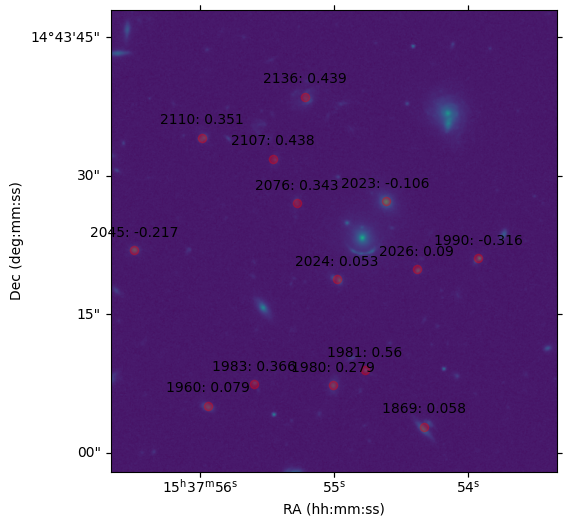

In [12]:
%matplotlib inline
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    not_neighbour_data_legacy["RAJ2000"], not_neighbour_data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = not_neighbour_data_legacy.index[i]  # Accessing the 'objid' column from your DataFrame
    zphot = not_neighbour_data_legacy.iloc[i]["zphot"]  
    plt.annotate(
        f"{obj_id}: {round(zphot - zphot_deflector, 3)}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)

ax.invert_xaxis()
# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

## Save the Redshift data to the YAML file

In [13]:
# Existing YAML file with other parameters
existing_yaml_file = "/kaggle/input/point-estimates/DESIJ15371443_point_estimates.yml"

# Variables to include in the YAML file
z_phot = selected_data_legacy.loc[central_deflector_id,'zphot']
e_zphot = selected_data_legacy.loc[central_deflector_id,'e_zphot']

environment_variables = {
    "z_phot": [z_phot, e_zphot]
}

# make all the numpy variales to float
environment_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in environment_variables.items()
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# # Write the updated content back to the YAML file
# with open(existing_yaml_file, "w") as file:
#     yaml.dump(existing_content, file, default_flow_style=False)